## Bayesian A/B Testing Project: T-Test

This notebook explore the **frequentist approach** focusing on **t-test** to further contrast the difference in outputs and interpretations when using Bayesian method. 

#### Load Packages

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [6]:
data = pd.read_csv('../public/marketing_data_sample.csv')

In [7]:
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


#### Data Processing & Exporatory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [9]:
test_group_counts = data['test group'].value_counts()
test_group_counts

test group
ad     564577
psa     23524
Name: count, dtype: int64

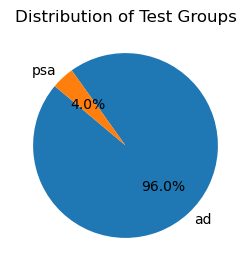

In [10]:
test_group_counts = {'ad': 564577, 'psa': 23524}

labels = test_group_counts.keys()
sizes = test_group_counts.values()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Test Groups')
plt.show()

In [11]:
conversion_counts = data['converted'].value_counts()
conversion_counts

converted
False    573258
True      14843
Name: count, dtype: int64

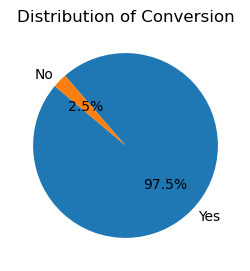

In [12]:
conversion_counts = {'Yes': 573258, 'No': 14843}

labels = conversion_counts.keys()
sizes = conversion_counts.values()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Conversion')
plt.show()

In [13]:
most_ads_day_counts = data['most ads day'].value_counts()
most_ads_day_counts

most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64

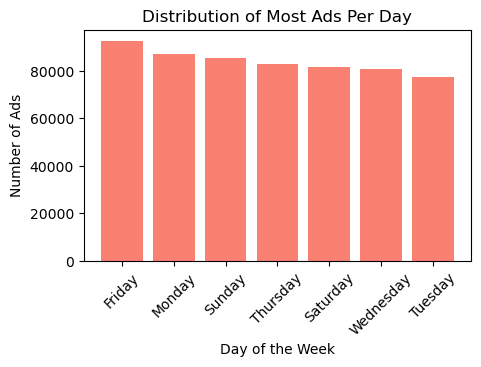

In [14]:
most_ads_day_counts = {
    'Friday': 92608,
    'Monday': 87073,
    'Sunday': 85391,
    'Thursday': 82982,
    'Saturday': 81660,
    'Wednesday': 80908,
    'Tuesday': 77479
}

days = list(most_ads_day_counts.keys())
counts = list(most_ads_day_counts.values())

plt.figure(figsize=(5, 3))
plt.bar(days, counts, color='salmon')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ads')
plt.title('Distribution of Most Ads Per Day')
plt.xticks(rotation=45)
plt.show()

In [15]:
data['converted'] = data['converted'].map({False: 0, True: 1})

In [16]:
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,0,1,Tuesday,23
588097,588097,1327975,ad,0,1,Tuesday,23
588098,588098,1038442,ad,0,3,Tuesday,23
588099,588099,1496395,ad,0,1,Tuesday,23


In [17]:
conversion_by_group_day = data.groupby(['most ads day', 'test group']).agg(
    total_users=('user id', 'count'),
    total_conversions=('converted', 'sum')
).reset_index()

conversion_by_group_day['conversion_rate'] = (
    conversion_by_group_day['total_conversions'] / conversion_by_group_day['total_users'] * 100
)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

conversion_by_group_day['most ads day'] = pd.Categorical(
    conversion_by_group_day['most ads day'], 
    categories=weekday_order, 
    ordered=True
)

conversion_by_group_day = conversion_by_group_day.sort_values('most ads day')

conversion_by_group_day

,most ads day,test group,total_users,total_conversions,conversion_rate
2,Monday,ad,83571,2778,3.324120
3,Monday,psa,3502,79,2.255854
10,Tuesday,ad,74572,2270,3.044038
11,Tuesday,psa,2907,42,1.444788
12,Wednesday,ad,77418,1963,2.535586
13,Wednesday,psa,3490,55,1.575931
8,Thursday,ad,79077,1711,2.163714
9,Thursday,psa,3905,79,2.023047
0,Friday,ad,88805,1995,2.246495
1,Friday,psa,3803,62,1.630292


In [18]:
conversion_by_group_hour = data.groupby(['most ads hour', 'test group']).agg(
    total_users=('user id', 'count'),
    total_conversions=('converted', 'sum')
).reset_index()

conversion_by_group_hour['conversion_rate'] = (
    conversion_by_group_hour['total_conversions'] / conversion_by_group_hour['total_users'] * 100
)

conversion_by_group_hour['most ads hour'] = pd.to_numeric(conversion_by_group_hour['most ads hour'], errors='coerce')
conversion_by_group_hour = conversion_by_group_hour.sort_values('most ads hour').reset_index(drop=True)

conversion_by_group_hour

,most ads hour,test group,total_users,total_conversions,conversion_rate
0,0,ad,5309,102,1.921266
1,0,psa,227,0,0.000000
2,1,ad,4615,62,1.343445
3,1,psa,187,0,0.000000
4,2,ad,5152,39,0.756988
5,2,psa,181,0,0.000000
6,3,ad,2590,27,1.042471
7,3,psa,89,1,1.123596
8,4,ad,694,11,1.585014
9,4,psa,28,0,0.000000


#### T-Test

In [19]:
# Perform T-tests for each day and store results
ttest_results = []
unique_days = data['most ads day'].unique()

for day in unique_days:
    ad_group = data[(data['most ads day']==day) & (data['test group']=='ad')]['converted']
    psa_group = data[(data['most ads day']==day) & (data['test group']=='psa')]['converted']
    
    t_stat, p_val = ttest_ind(ad_group, psa_group, equal_var=False, nan_policy='omit')
    
    ttest_results.append({
        'Day': day,
        'T-statistic': round(t_stat, 4),
        'P-value': round(p_val, 4),
        'Significant': p_val < 0.05 
    })

# Convert results to DataFrame
ttest_results_df = pd.DataFrame(ttest_results)

# Sort by day
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ttest_results_df['Day'] = pd.Categorical(ttest_results_df['Day'], categories=weekday_order, ordered=True)
ttest_results_df = ttest_results_df.sort_values('Day').reset_index(drop=True)

# Display the results
ttest_results_df

,Day,T-statistic,P-value,Significant
0,Monday,4.1324,0.0000,True
1,Tuesday,6.9495,0.0000,True
2,Wednesday,4.3963,0.0000,True
3,Thursday,0.6084,0.5429,False
4,Friday,2.9161,0.0036,True
5,Saturday,3.2389,0.0012,True
6,Sunday,1.5336,0.1252,False


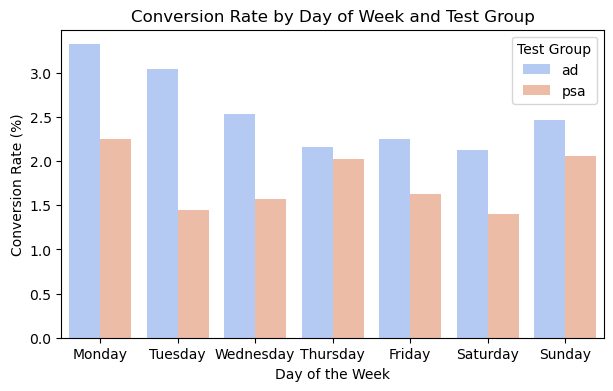

In [20]:
plt.figure(figsize=(7, 4))
sns.barplot(
    x='most ads day', y='conversion_rate', hue='test group', data=conversion_by_group_day, palette='coolwarm'
)
plt.title('Conversion Rate by Day of Week and Test Group')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Test Group')
plt.show()

In [21]:
# Perform t-tests for each hour and store results
ttest_results_hour = []
unique_hours = data['most ads hour'].unique()

for hour in unique_hours:
        ad_group = data[(data['most ads hour'] == hour) & (data['test group'] == 'ad')]['converted']
        psa_group = data[(data['most ads hour'] == hour) & (data['test group'] == 'psa')]['converted']
        
        t_stat, p_val = ttest_ind(ad_group, psa_group, equal_var=False, nan_policy='omit')
        
        ttest_results_hour.append({
            'Hour': hour,
            'T-statistic': round(t_stat, 4),
            'P-value': round(p_val, 4),
            'Significant': p_val < 0.05
        })

# Convert results into a DataFrame
ttest_results_hour_df = pd.DataFrame(ttest_results_hour)

# Sort by hour
ttest_results_hour_df = ttest_results_hour_df.sort_values('Hour').reset_index(drop=True)

# Display the results
ttest_results_hour_df

,Hour,T-statistic,P-value,Significant
0,0,10.1970,0.0000,True
1,1,7.9266,0.0000,True
2,2,6.2682,0.0000,True
3,3,-0.0711,0.9435,False
4,4,3.3408,0.0009,True
5,5,4.0411,0.0001,True
6,6,6.8606,0.0000,True
7,7,1.6208,0.1062,False
8,8,2.2329,0.0258,True
9,9,2.8196,0.0049,True


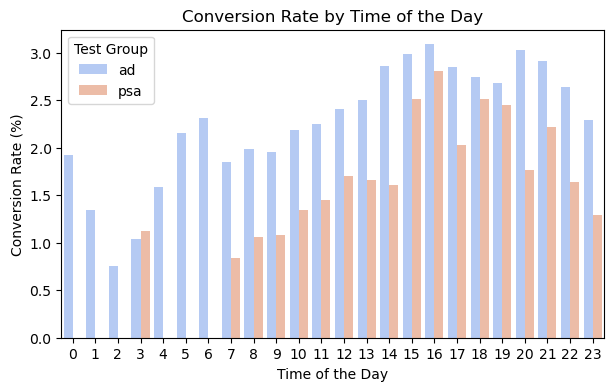

In [22]:
plt.figure(figsize=(7, 4))
sns.barplot(
    x='most ads hour', y='conversion_rate', hue='test group', data=conversion_by_group_hour, palette='coolwarm'
)
plt.title('Conversion Rate by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Test Group')
plt.show()